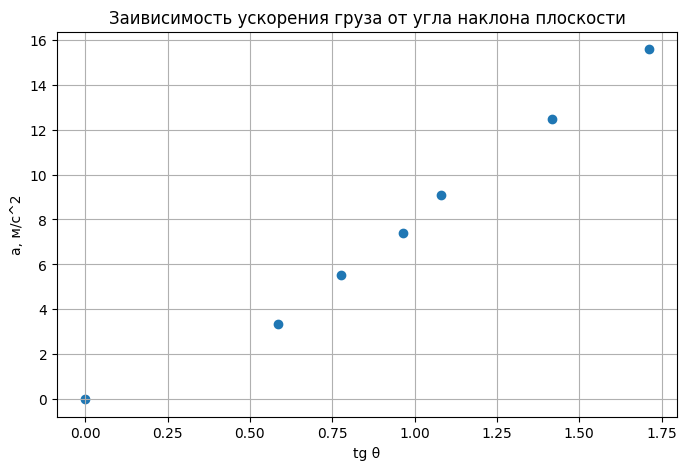

In [1]:
#Упражнение 1
import matplotlib.pyplot as plt
import numpy as np
x = [0,0.58435, 0.77568, 1.0799, 0.96569, 1.41759, 1.71129]
y = [0, 3.32988, 5.54364, 9.07363, 7.40818, 12.4912, 15.57629]
plt.figure(figsize=(8,5), dpi=100)
plt.xticks([0,0.25, 0.5,0.75,1.0,1.25,1.5,1.75])
plt.yticks([0,2,4,6,8,10,12,14,16,18])
plt.grid()
plt.xlabel('tg θ')
plt.ylabel('a, м/с^2')
plt.title('Заивисимость ускорения груза от угла наклона плоскости')
plt.scatter(x, y)
plt.show()
           

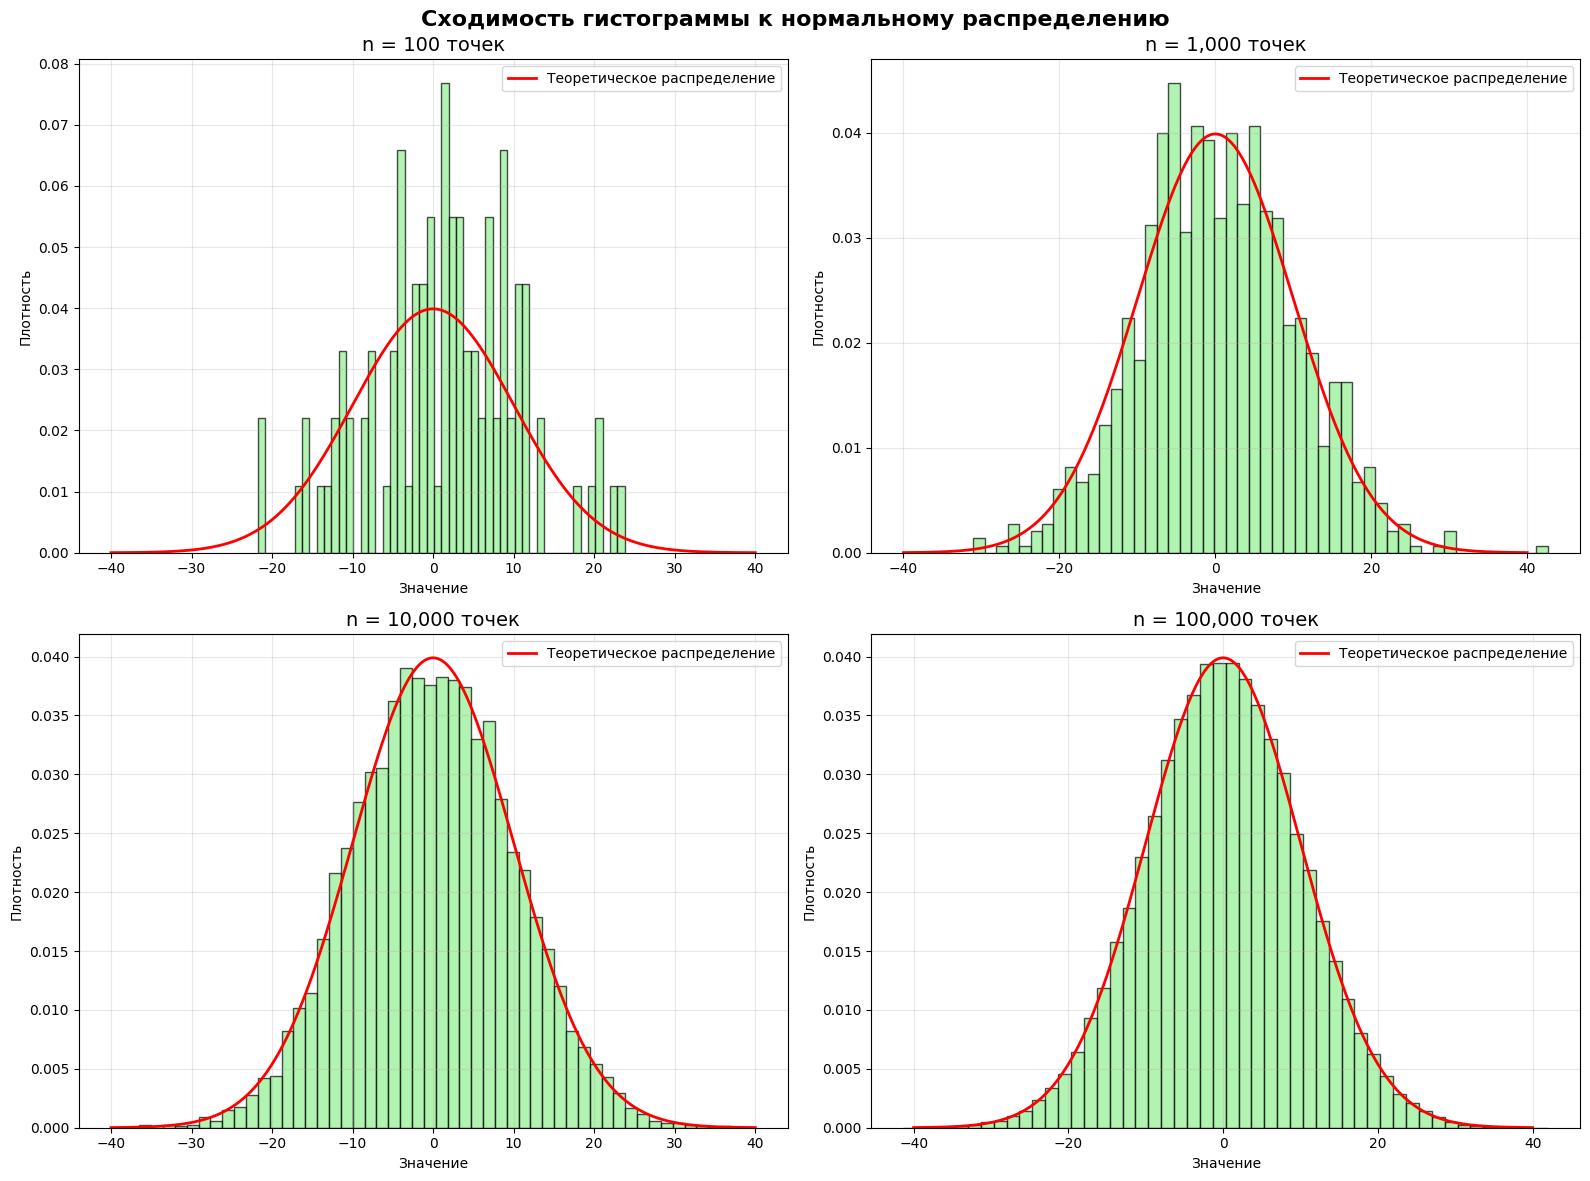

In [ ]:
#Упражнение 2
import numpy as np
import matplotlib.pyplot as plt
import math
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Сходимость гистограммы к нормальному распределению', 
             fontsize=16, fontweight='bold')
dg = 0
std = 10
sz = [100, 1000, 10000, 100000]

for i, size in enumerate(sz):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    v = np.random.normal(dg, std, size)
    n, b, patches = ax.hist(v, bins=50, density=True, alpha=0.7, 
                              color='lightgreen', edgecolor='black')

    x = np.linspace(dg - 4*std, dg + 4*std, 1000)
    y = np.exp(-0.5*((x-dg)/std)**2) / (std * np.sqrt(2*np.pi))
    ax.plot(x, y, 'r-', linewidth=2, label='Теоретическое распределение')
    
    ax.set_title(f'n = {size:,} точек', fontsize=14)
    ax.set_xlabel('Значение')
    ax.set_ylabel('Плотность')
    ax.grid(True, alpha=0.3)
    ax.legend()
plt.tight_layout()
plt.show()


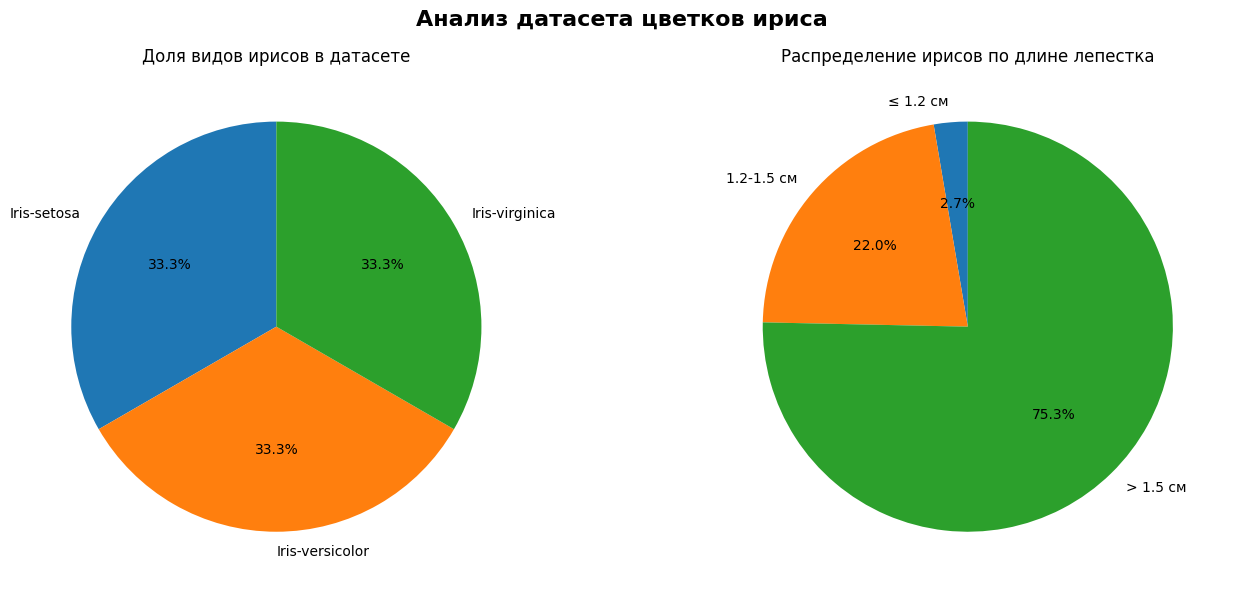

In [ ]:
#Упражнение 3
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('iris_data.csv')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
s = df['Species'].value_counts()
ax1.pie(s.values, labels=s.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Доля видов ирисов в датасете')
l = df['PetalLengthCm']
cat = {
    '≤ 1.2 см': len(l[l <= 1.2]),
    '1.2-1.5 см': len(l[(l > 1.2) & (l <= 1.5)]),
    '> 1.5 см': len(l[l > 1.5])
}

ax2.pie(cat.values(), labels=cat.keys(), autopct='%1.1f%%', startangle=90)
ax2.set_title('Распределение ирисов по длине лепестка')
plt.suptitle('Анализ датасета цветков ириса', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


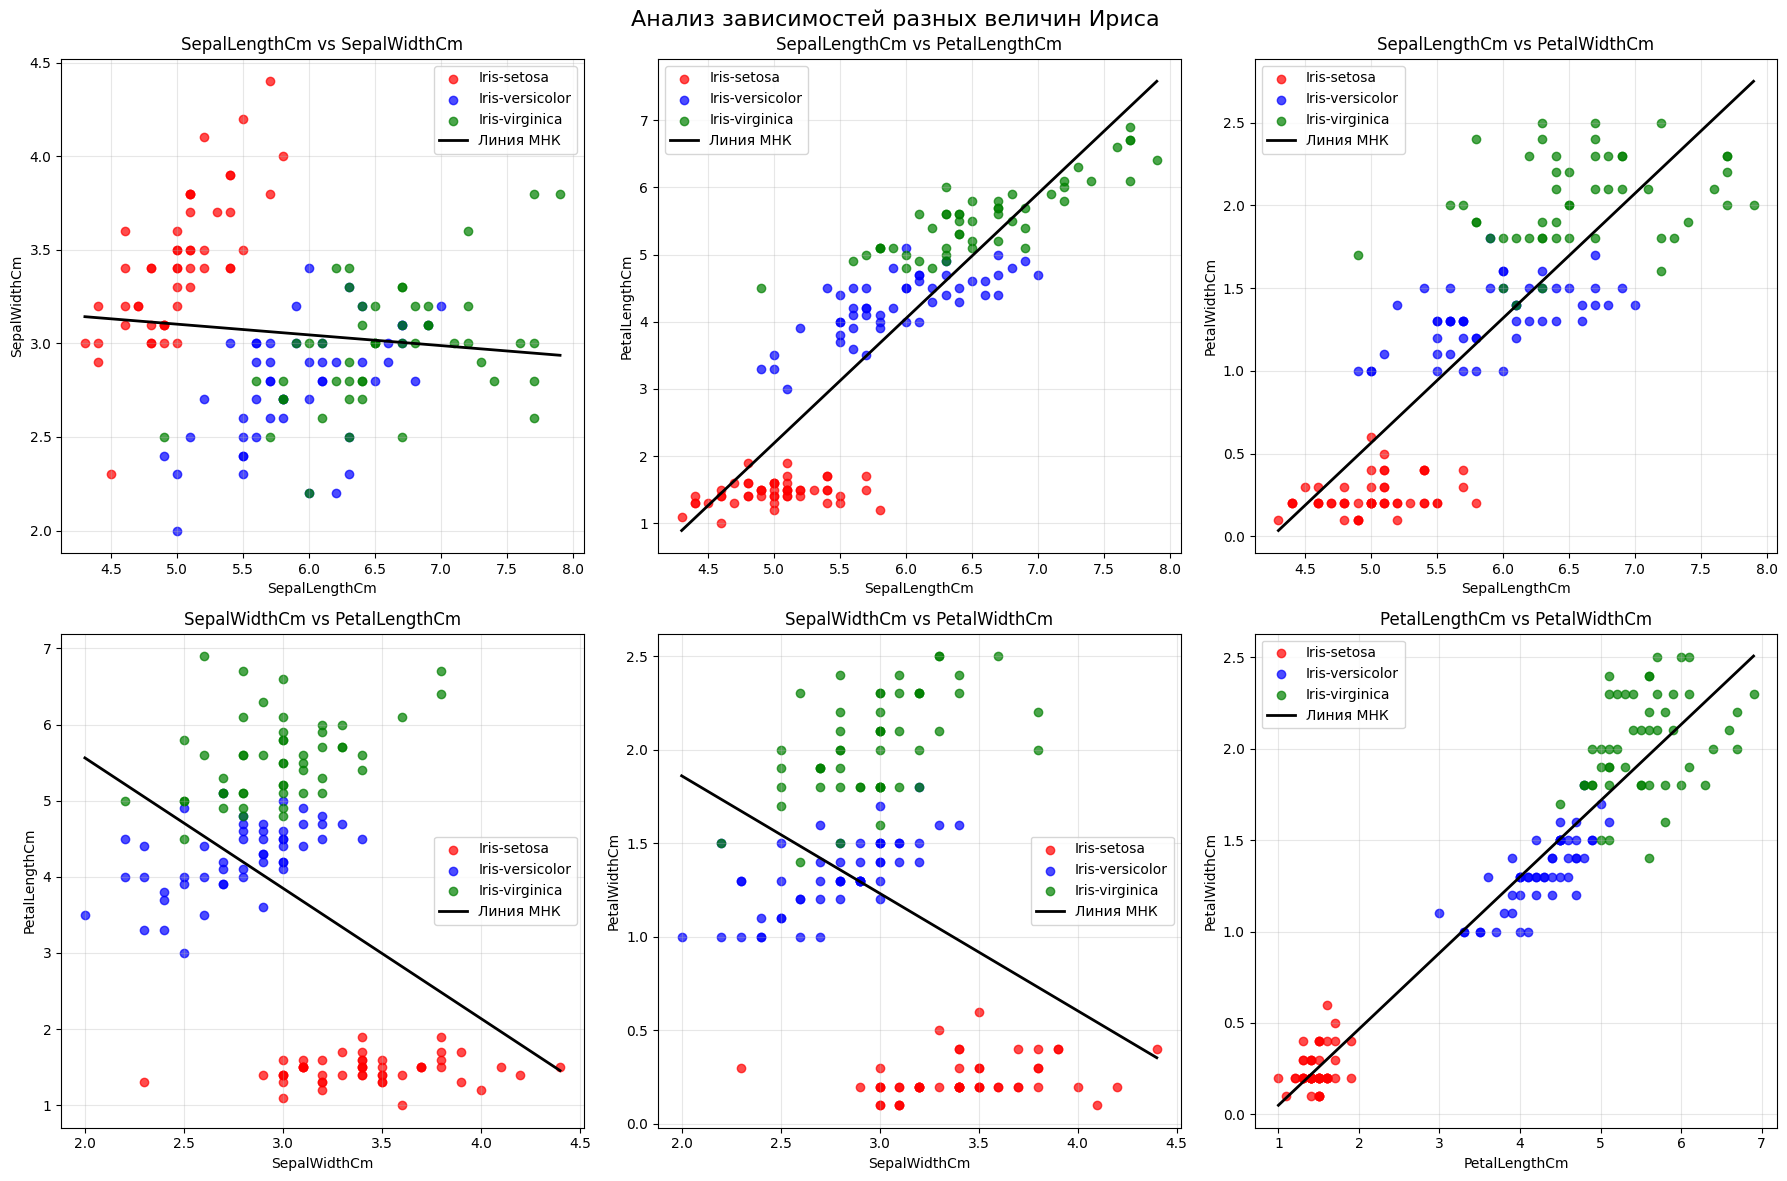

Коэффициенты

SepalLengthCm → SepalWidthCm:
  Коэффициент (наклон): -0.0573
  Свободный член: 3.3886

SepalLengthCm → PetalLengthCm:
  Коэффициент (наклон): 1.8575
  Свободный член: -7.0954

SepalLengthCm → PetalWidthCm:
  Коэффициент (наклон): 0.7538
  Свободный член: -3.2063

SepalWidthCm → PetalLengthCm:
  Коэффициент (наклон): -1.7112
  Свободный член: 8.9847

SepalWidthCm → PetalWidthCm:
  Коэффициент (наклон): -0.6275
  Свободный член: 3.1152

PetalLengthCm → PetalWidthCm:
  Коэффициент (наклон): 0.4164
  Свободный член: -0.3665


In [ ]:
#Упражнение 4


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv('iris_data.csv')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Анализ зависимостей разных величин Ириса', fontsize=16)

pr = [
    ('SepalLengthCm', 'SepalWidthCm'),
    ('SepalLengthCm', 'PetalLengthCm'),
    ('SepalLengthCm', 'PetalWidthCm'),
    ('SepalWidthCm', 'PetalLengthCm'),
    ('SepalWidthCm', 'PetalWidthCm'),
    ('PetalLengthCm', 'PetalWidthCm')
]
c = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}
for i, (x_col, y_col) in enumerate(pr):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    for s in df['Species'].unique():
        sd = df[df['Species'] == s]
        ax.scatter(sd[x_col], sd[y_col], 
                  c=c[s], label=s, alpha=0.7)
    X = df[[x_col]].values
    y = df[y_col].values
    m = LinearRegression()
    m.fit(X, y)
    y_pred = m.predict(X)
    
    x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_line = m.predict(x_line)
    ax.plot(x_line, y_line, 'k-', linewidth=2, label='Линия МНК')

    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Коэффициенты")
for x_col, y_col in pr:
    X = df[[x_col]].values
    y = df[y_col].values
    model = LinearRegression()
    model.fit(X, y)
    print(f"\n{x_col} → {y_col}:")
    print(f"  Коэффициент (наклон): {model.coef_[0]:.4f}")
    print(f"  Свободный член: {model.intercept_:.4f}")



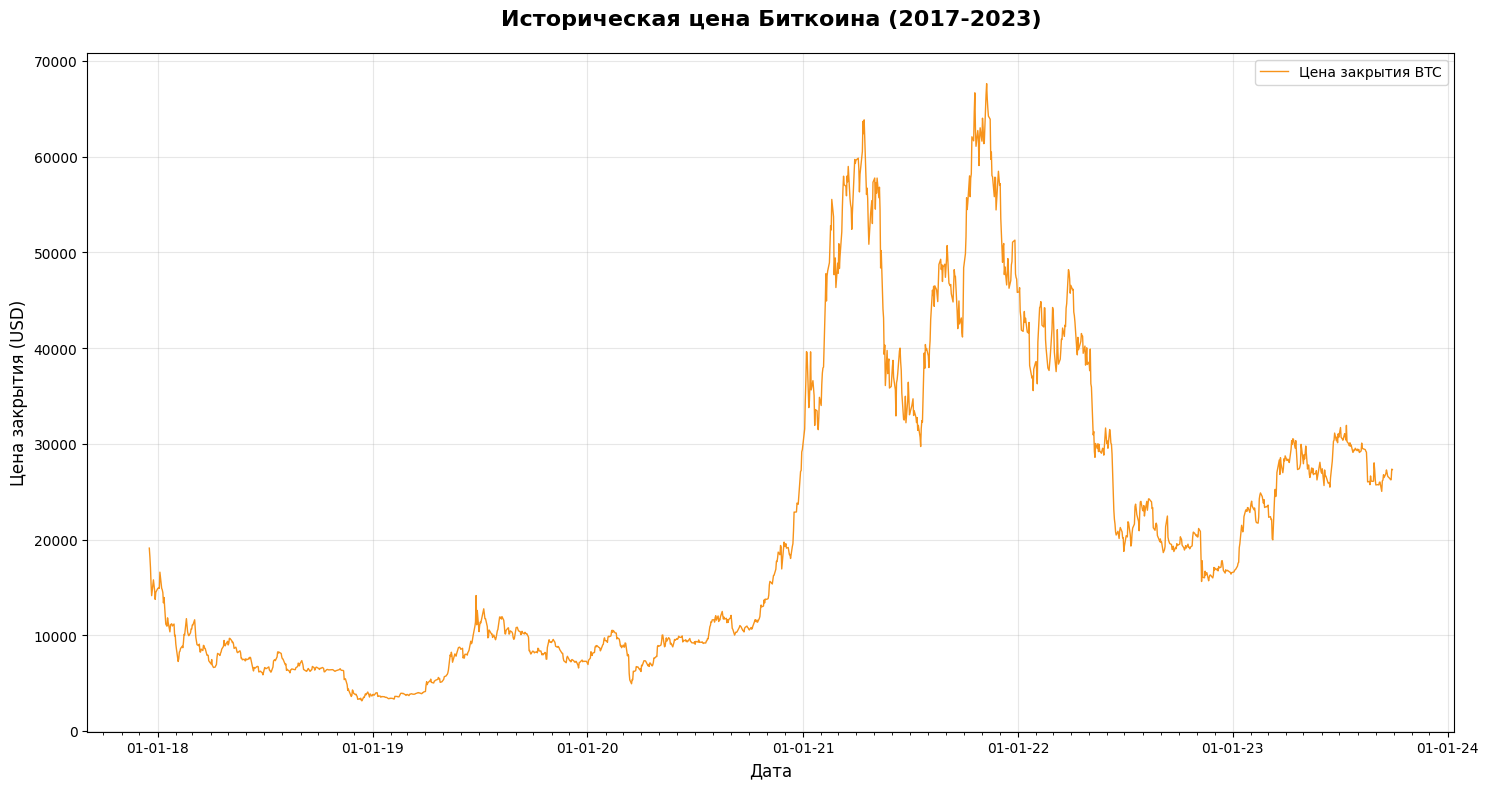

In [ ]:
#Упражнение 5

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df = pd.read_csv('BTC_data.csv')
df['time'] = pd.to_datetime(df['time'])
plt.figure(figsize=(15, 8))
plt.plot(df['time'], df['close'], linewidth=1, color='#F7931A', label='Цена закрытия BTC')
plt.title('Историческая цена Биткоина (2017-2023)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Цена закрытия (USD)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator()) 

plt.legend()
plt.tight_layout()
plt.show()

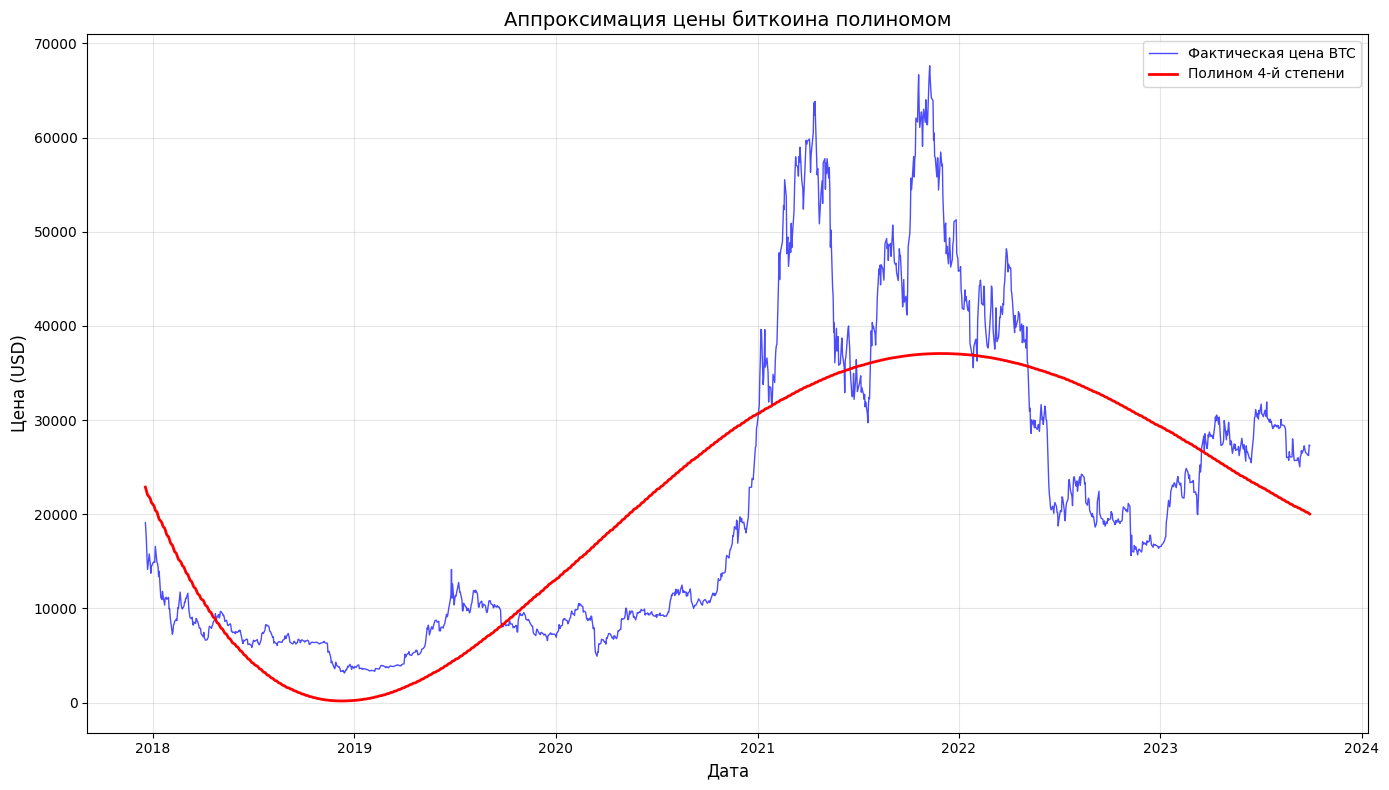

In [29]:
#Упражнение 6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('BTC_data.csv')
df['time'] = pd.to_datetime(df['time'])
x_days = np.arange(len(df))
f = np.poly1d(np.polyfit(x_days, df['close'].values, 4))
v = f(x_days)
plt.figure(figsize=(14, 8))
plt.plot(df['time'], df['close'].values, label='Фактическая цена BTC', color='blue', alpha=0.7, linewidth=1)
plt.plot(df['time'], v, label=f'Полином {4}-й степени', color='red', linewidth=2)

plt.title('Аппроксимация цены биткоина полиномом', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Цена (USD)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
#Упражнение 8
l1 = [1, 2, 3, 4, 5, 6, 7]
l2 = [4, 5, 6, 7, 8, 9, 10]
s1 = set(l1)
s2 = set(l2)
res = {
    "Уникальные для первого списка": s1 - s2, 
    "Уникальные для второго списка": s2 - s1,  
    "Уникальные для объединения списков": s1 ^ s2,  
    "Содержащиеся в обоих списках": s1 & s2}
print(res, sep = " ")

{'Уникальные для первого списка': {1, 2, 3}, 'Уникальные для второго списка': {8, 9, 10}, 'Уникальные для объединения списков': {1, 2, 3, 8, 9, 10}, 'Содержащиеся в обоих списках': {4, 5, 6, 7}}
